In [1]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from svgpathtools import svg2paths2
from scipy.fft import fft, fftfreq

ModuleNotFoundError: No module named 'svgpathtools'

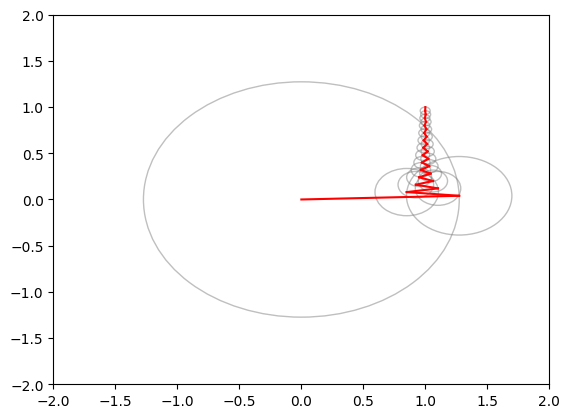

In [19]:
# Define the square path using discrete points
def square_path(N):
    t = np.linspace(0, 2*np.pi, N, endpoint=False)
    x = np.piecewise(t, [t < np.pi/2, (t >= np.pi/2) & (t < np.pi), 
                         (t >= np.pi) & (t < 3*np.pi/2), t >= 3*np.pi/2],
                        [1, lambda t: -1, -1, lambda t: 1])
    y = np.piecewise(t, [t < np.pi/2, (t >= np.pi/2) & (t < np.pi), 
                        (t >= np.pi) & (t < 3*np.pi/2), t >= 3*np.pi/2],
                        [lambda t: 1, 1, lambda t: -1, -1])
    return x + 1j*y

# Calculate the DFT coefficients for the square path
def dft(path):
    N = len(path)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, path)
    return X / N

# Initialize a list to store the trace of the last point
trace = []

# Draw the epicycles and the trace
def draw_epicycles(ax, fourier, t, trace_line):
    x, y = 0, 0
    for coef in fourier:
        prev_x, prev_y = x, y
        freq, ampl, phase = coef[0], np.abs(coef[1]), np.angle(coef[1])
        x += ampl * np.cos(freq * t + phase)
        y += ampl * np.sin(freq * t + phase)
        ax.add_patch(plt.Circle((prev_x, prev_y), ampl, fill=False, color='gray', alpha=0.5))
        ax.plot([prev_x, x], [prev_y, y], 'r-')
    
    trace.append((x, y))  # Add the current point to the trace
    trace_x, trace_y = zip(*trace)
    trace_line.set_data(trace_x, trace_y)  # Update the trace line

    return x, y

# Animation update function
def animate(i, trace_line):
    ax.clear()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    draw_epicycles(ax, fourier, i * 2 * np.pi / frames, trace_line)

# Number of points and frames for animation, and interval
N = 100
frames = 100  # Reduced number of frames
interval = 20  # Faster display of each frame

# Create the square path and calculate its DFT
path = square_path(N)
fourier = sorted(enumerate(dft(path)), key=lambda x: -np.abs(x[1]))

# Setup plot for animation
fig, ax = plt.subplots()
trace_line, = ax.plot([], [], 'b-', linewidth=1)  # Initialize trace line

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=interval, fargs=(trace_line,))

# Display the animation
HTML(ani.to_jshtml())

In [20]:
def svg_to_points(svg_file, num_points=100):
    paths, attributes, svg_attributes = svg2paths2(svg_file)
    all_points = []
    for path in paths:
        for segment in path:
            for i in range(num_points):
                point = segment.point(i / num_points)
                all_points.append([point.real, point.imag])
    return np.array(all_points)